# Making maps

![All the suburbs in Sydney](all_burbs.png)

We're going to get some shapefiles from data.gov.au, and then we're going to draw some maps

---

You'll need some prequisite libraries.

**NOTE: this mac method might well apply to you on a PC these days too. They've updated the libraries.**

If you're on a mac, it's easy, just do this:
```
pip install pandas shapely fiona descartes pyproj 
pip install geopandas
```
You may have some already but pip will be cool with that.

If that works for you, ignore these next steps.

---

If you are on windows, and the steps above didn't work out for you, geopandas is installed differently, so follow these 3 steps:

1. Install Visual CPPD Build Tools with the following link: https://visualstudio.microsoft.com/visual-cpp-build-tools/
2. Restart your computer
3. Open Visual Studio Code again after the restart and copy and paste the following commands into your terminal:

    ```
    pip install wheel
    pip install pipwin
    pip install numpy
    pip install pandas
    pip install shapely
    pip install pyproj
    pip install six
    pip install rtree
    pipwin install gdal
    pipwin install fiona
    pip install descartes
    pip install geopandas
    ```

Copy that whole lot into your terminal, press enter, and it'll sort it out.

--- 

We're going to get a shapefile of suburb boundaries from here:

https://data.gov.au/dataset/ds-dga-91e70237-d9d1-4719-a82f-e71b811154c6/details

In [224]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = r"world-administrative-boundaries.shp"
zip_file_name = "world-administrative-boundaries.zip"



In [225]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

To get a load of shape files from data.gov.au, more specifically, [here](https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries/resource/bf8b5180-fcea-44bd-bd76-af14cc4b0fe0)

In [226]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [227]:
if os.path.isfile("Tesla_Dealth.csv"):
    filepath = "Tesla_Dealth.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

penalty_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [228]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


#### Shapefiles are the format that a lot of GIS tools use.

#### GIS means Geographic Information System

pronounced: _gee eye ess_

not pronounced: _jizz_

In [229]:
burbs = gp.read_file(shp_file_name) 
#gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
61,ZMB,Member State,ZMB,Zambia,Africa,Eastern Africa,ZM,Zambie,"POLYGON ((32.940 -9.405, 32.939 -9.416, 32.944..."
183,BIH,Member State,BIH,Bosnia & Herzegovina,Europe,Southern Europe,BA,Bosnie-Herzégovine,"POLYGON ((19.040 44.861, 19.121 44.901, 19.175..."
237,BRA,Member State,BRA,Brazil,Americas,South America,BR,Brésil,"MULTIPOLYGON (((-48.551 -27.821, -48.557 -27.8..."
101,LBR,Member State,LBR,Liberia,Africa,Western Africa,LR,Libéria,"POLYGON ((-8.470 7.561, -8.436 7.531, -8.416 7..."
156,PSE,Occupied Territory,XXX,West Bank,Asia,Western Asia,PS,État de Palestine,"POLYGON ((35.553 32.394, 35.560 32.378, 35.571..."
103,NIC,Member State,NIC,Nicaragua,Americas,Central America,NI,Nicaragua,"POLYGON ((-83.132 14.993, -83.197 14.957, -83...."
249,BGD,Member State,BGD,Bangladesh,Asia,Southern Asia,BD,Bangladesh,"MULTIPOLYGON (((91.897 21.477, 91.887 21.473, ..."
31,KAZ,Member State,KAZ,Kazakhstan,Asia,Central Asia,KZ,Kazakhstan,"POLYGON ((87.348 49.093, 87.316 49.098, 87.201..."
177,URY,Member State,URY,Uruguay,Americas,South America,UY,Uruguay,"POLYGON ((-53.374 -33.741, -53.399 -33.757, -5..."
164,LBN,Member State,LBN,Lebanon,Asia,Western Asia,LB,Liban,"POLYGON ((35.973 34.648, 36.031 34.633, 36.087..."


There are a bunch of junk columns in there. Normally I'd leave them in, but because we're going to be looking are this data in dataframes, I'll take them out so that it's easier on the eyes.

In [230]:
cols_to_drop = ["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(300)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.921 -1.002, 33.920 -1.001, 33.461..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.971 42.255, 70.981 42.262, 71.033..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.970 54.021, -9.938 53.995, ..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.136 15.753, 40.129 15.732, ..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.244 -58.495, -26.249 -58.4..."
...,...,...,...,...,...,...,...,...,...
251,BEL,Member State,BEL,Belgium,Europe,Western Europe,BE,Belgique,"POLYGON ((6.012 50.757, 6.055 50.724, 6.167 50..."
252,WSM,Member State,WSM,Samoa,Oceania,Polynesia,WS,Samoa,"MULTIPOLYGON (((-171.429 -14.016, -171.442 -14..."
253,AIA,UK Non-Self-Governing Territory,AIA,Anguilla,Americas,Caribbean,AI,Anguilla,"POLYGON ((-63.154 18.165, -63.168 18.164, -63...."
254,ISR,Member State,ISR,Israel,Asia,Western Asia,IL,Israël,"POLYGON ((35.624 33.246, 35.632 33.246, 35.660..."


Only uncomment this if you've got a fast computer and a lot of time!

It makes the map at the top of this file.

In [231]:
# burbs.geometry.plot()

In [232]:
shp_file_path = 'world-administrative-boundaries.shp'  # 确认文件名和路径正确

# 尝试读取形状文件
try:
    gdf = gp.read_file(shp_file_path)
    print("Shapefile loaded successfully.")
    print(gdf.head())
except Exception as e:
    print(f"Error loading shapefile: {e}")
    gdf = None

if gdf is not None:
    # 读取你的死亡数据
    csv_file_path = 'Tesla_Dealth.csv'  # 确保路径正确
    try:
        penalty_data = pd.read_csv(csv_file_path)
        print("CSV file loaded successfully.")
        print(penalty_data.head())
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        penalty_data = None

    if penalty_data is not None:
        # 确保数据框中包含'Country'和'Deaths'列
        if 'Country' in penalty_data.columns and 'Deaths' in penalty_data.columns:
            # 按国家分组并计算每个国家的死亡人数总和
            country_deaths = penalty_data.groupby('Country')['Deaths'].sum().reset_index()

            # 将数据框转换为GeoDataFrame
            geo_data = gdf.set_index('name').join(country_deaths.set_index('Country'))

            # 绘制地图
            fig, ax = plt.subplots(1, 1, figsize=(15, 10))
            geo_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

            plt.title('Number of Deaths by Country')
            plt.show()
        else:
            print("The dataframe does not contain 'Country' or 'Deaths' column.")
else:
    print("Shapefile could not be loaded.")

Shapefile loaded successfully.
   iso3        status color_code                                        name  \
0   UGA  Member State        UGA                                      Uganda   
1   UZB  Member State        UZB                                  Uzbekistan   
2   IRL  Member State        IRL                                     Ireland   
3   ERI  Member State        ERI                                     Eritrea   
4  None  UK Territory        GBR  South Georgia & the South Sandwich Islands   

    continent           region iso_3166_1_  \
0      Africa   Eastern Africa          UG   
1        Asia     Central Asia          UZ   
2      Europe  Northern Europe          IE   
3      Africa   Eastern Africa          ER   
4  Antarctica             None        None   

                                  french_shor  \
0                                     Ouganda   
1                                 Ouzbékistan   
2                                     Irlande   
3              

Let's pull out a single row, a single suburb, and look at it.

iso3                                                         UGA
status                                              Member State
color_code                                                   UGA
name                                                      Uganda
continent                                                 Africa
region                                            Eastern Africa
iso_3166_1_                                                   UG
french_shor                                              Ouganda
geometry       POLYGON ((33.92110000000008 -1.001939999999933...
Name: 0, dtype: object


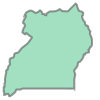

In [233]:
a = burbs.iloc[0]
print(a)
a.geometry

When we plot a geopandas polygon\* it actually draws it, rather than showing the textual information, which is nice.

\* it's acutally a Shapely polygon I think.

---

If we want to measure some distances, we need _points_. The distance between two shapes is ambiguous.

The easiest way to do this is to get the centroid of the polygon.

In [234]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(256)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,centroid
45,ETH,Member State,ETH,Ethiopia,Africa,Eastern Africa,ET,Éthiopie,"POLYGON ((42.400 12.470, 42.366 12.430, 42.339...",POINT (39.61618 8.63329)
48,None,None,None,Abyei,Africa,Northern Africa,None,Abyei,"POLYGON ((28.042 9.344, 27.814 9.801, 27.815 1...",POINT (28.39877 9.76758)
199,ARG,Member State,ARG,Argentina,Americas,South America,AR,Argentine,"MULTIPOLYGON (((-68.643 -54.889, -68.637 -54.8...",POINT (-65.16773 -35.37644)
68,BVT,NO Territory,NOR,Bouvet Island,Antarctica,None,BV,Bouvet Island,"POLYGON ((3.463 -54.447, 3.444 -54.452, 3.399 ...",POINT (3.41252 -54.42190)
209,TKM,Member State,TKM,Turkmenistan,Asia,Central Asia,TM,Turkménistan,"POLYGON ((66.538 37.366, 66.512 37.362, 66.490...",POINT (58.39132 39.21879)
...,...,...,...,...,...,...,...,...,...,...
220,ROU,Member State,ROU,Romania,Europe,Eastern Europe,RO,Roumanie,"POLYGON ((28.215 45.449, 28.227 45.449, 28.279...",POINT (24.96926 45.84361)
159,FLK,UK Non-Self-Governing Territory,GBR,Falkland Islands (Malvinas),Americas,South America,FK,Falkland Islands (Malvinas),"MULTIPOLYGON (((-61.031 -51.866, -61.016 -51.8...",POINT (-59.36330 -51.73712)
12,COD,Member State,COD,Democratic Republic of the Congo,Africa,Middle Africa,CD,République démocratique du Congo,"POLYGON ((27.455 5.016, 27.524 4.944, 27.660 4...",POINT (23.65501 -2.87623)
215,MNE,Member State,MNE,Montenegro,Europe,Southern Europe,ME,Monténégro,"POLYGON ((20.071 42.561, 20.056 42.563, 19.927...",POINT (19.25030 42.79159)


And we can plot this nicely as a map. Note that this is different to doing a `scatter` of lat and long because it's aware that they're spatially related; no squishing.

<Axes: >

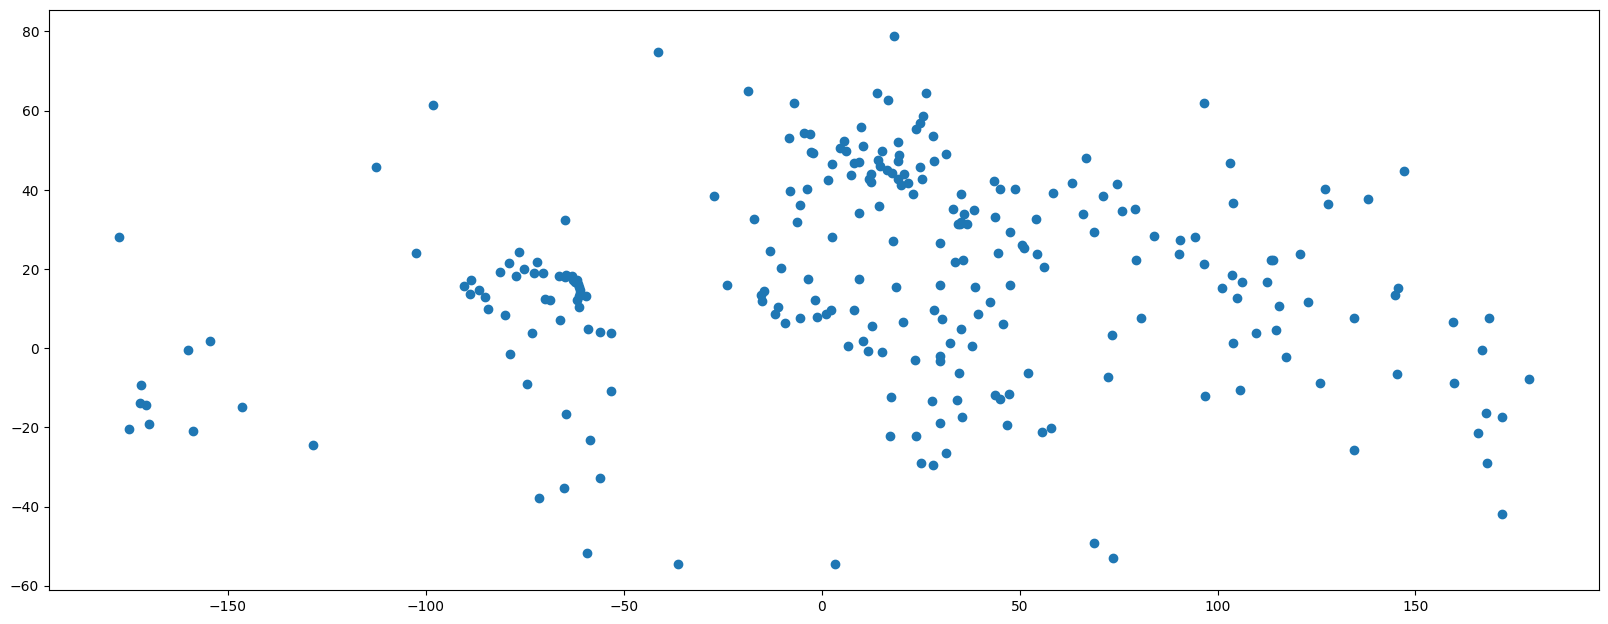

In [235]:
burbs.centroid.plot()

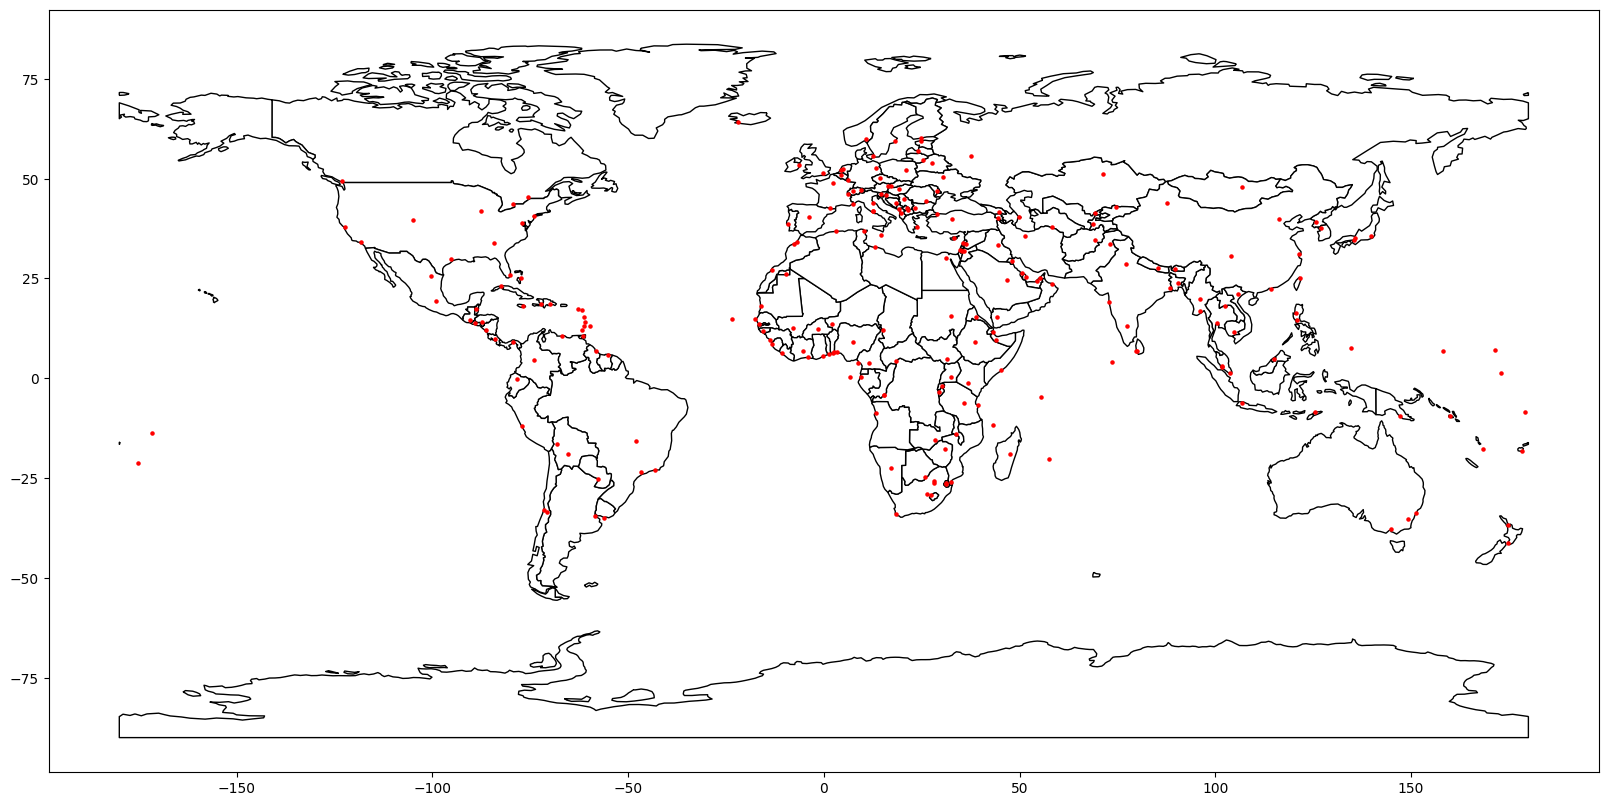

In [236]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);


In [237]:
import plotly.express as px
import pandas as pd
import geopandas as gpd

# 假设你已经有包含几何信息的 GeoDataFrame
# 这里是你可能的 GeoDataFrame, 假设名为 gdf

# 将 GeoDataFrame 转换为 DataFrame 以使用 plotly
gdf['lon'] = gdf.geometry.x
gdf['lat'] = gdf.geometry.y

# 创建 DataFrame
df = pd.DataFrame({'Longitude': gdf['lon'], 'Latitude': gdf['lat']})

# 使用 Plotly Express 生成地图
fig = px.scatter_geo(df, lon='Longitude', lat='Latitude', 
                    projection="natural earth", title="Global Tesla Cases")

# 显示地图
fig.show()


ValueError: x attribute access only provided for Point geometries

In [ ]:
buffered_points = burbs.centroid.buffer(0.1)

# 打印每个缓冲区的面积
print(buffered_points.area)

# 也可以计算点之间的距离（例如第一和第二个点）
print(burbs.centroid.distance(burbs.centroid.shift()))

# 如果你想获取所有点的总面积或范围
total_area = buffered_points.unary_union.area
print("总面积:", total_area)

0      0.031365
1      0.031365
2      0.031365
3      0.031365
4      0.031365
         ...   
251    0.031365
252    0.031365
253    0.031365
254    0.031365
255    0.031365
Length: 256, dtype: float64
0             NaN
1       50.847437
2       72.229401
3       60.310162
4      102.660635
          ...    
251      7.568188
252    188.186212
253    113.690264
254     98.902063
255     17.483250
Length: 256, dtype: float64
总面积: 8.029564135797628


/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/3798965560.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/3798965560.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))


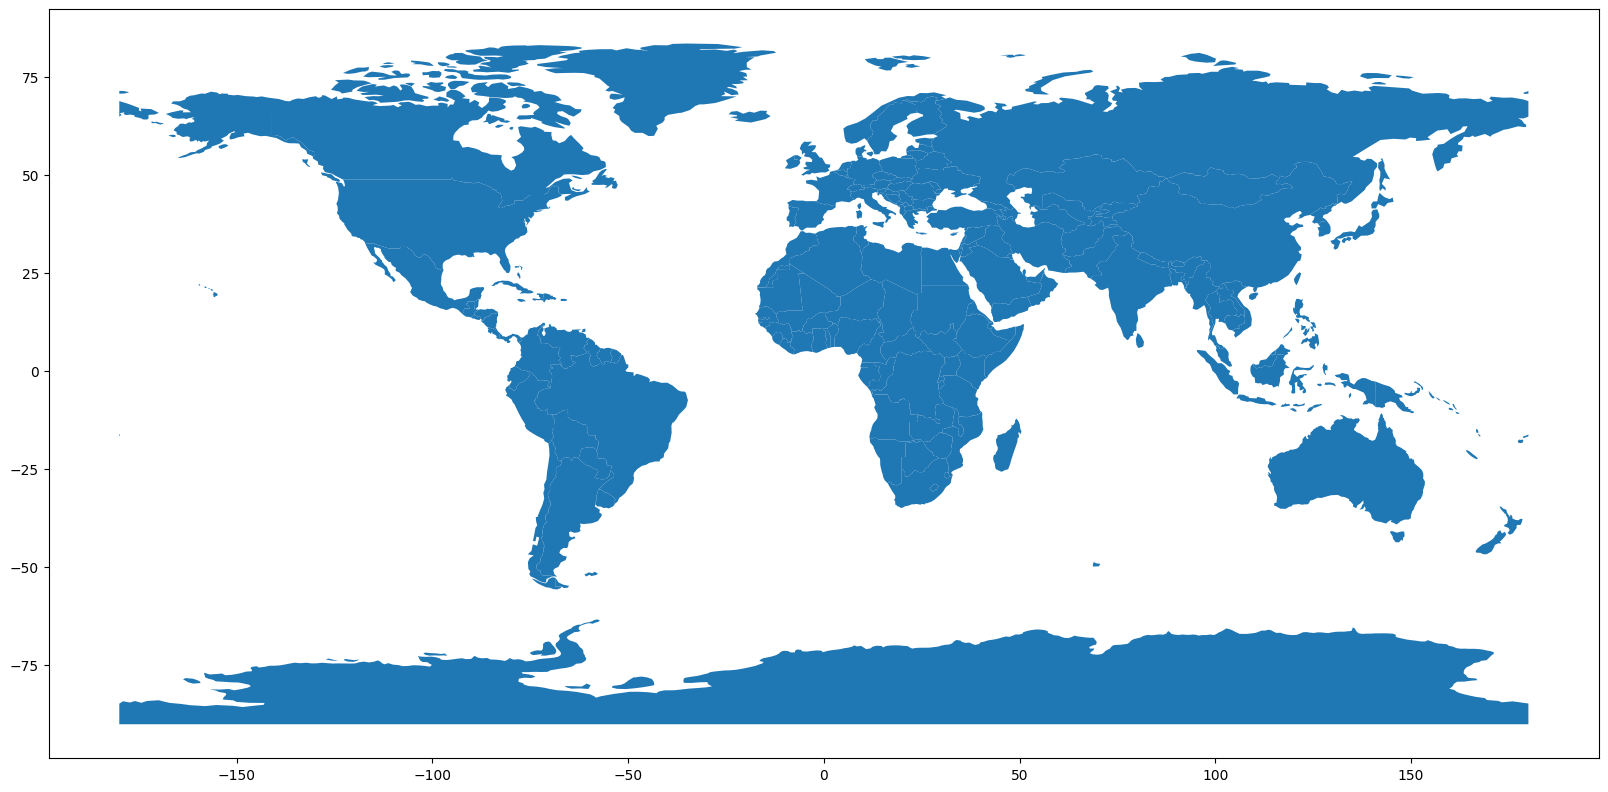

In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))

world.plot()
plt.show()

<Axes: >

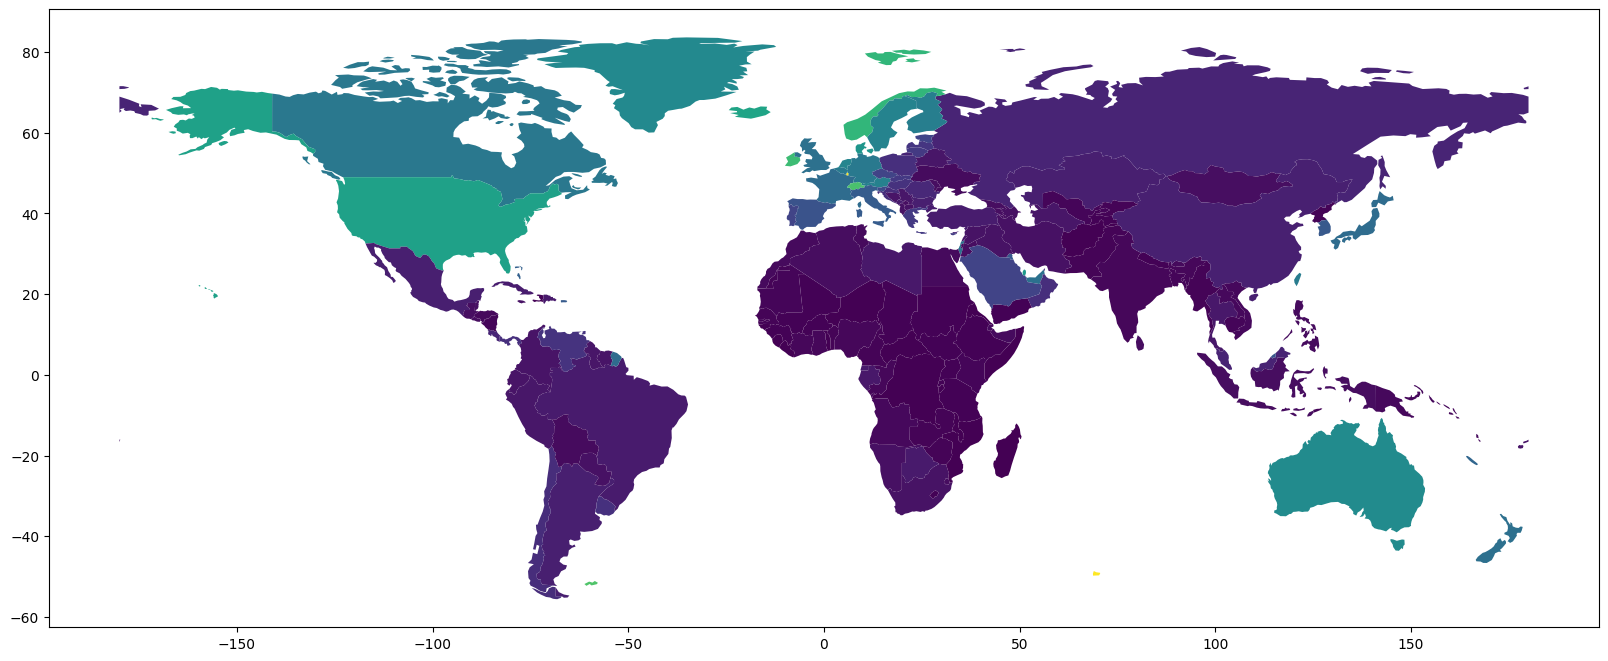

In [ ]:
world = world[ (world.name!="Antarctica")]

world['mortality_data']

world.plot(column='mortality_data') 

In [ ]:
penalty_data.columns = [ct.strip() for ct in penalty_data.columns]

In [ ]:
penalty_data.columns = penalty_data.columns.str.strip()

print(penalty_data.columns)

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


In [ ]:
penalty_data.Country = penalty_data.Country.str.upper()
print(penalty_data.Country)

0       GERMANY 
1           USA 
2       FINLAND 
3           USA 
4           USA 
         ...    
249         USA 
250         USA 
251         USA 
252         USA 
253         USA 
Name: Country, Length: 254, dtype: object


In [ ]:
print("World DataFrame Columns: ", world.columns)
print(world.head())

World DataFrame Columns:  Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'gdp_per_cap'],
      dtype='object')
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  gdp_per_cap  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     0.006176  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     0.001089  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...     0.001504  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...     0.046195  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.

In [ ]:


world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))



mortality_data = pd.read_csv('Tesla_Dealth.csv')

mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.upper()


print(mortality_data.columns)
print(mortality_data.head())



Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')
   Case #  Year       Date    Country State  \
0     254  2022  8/16/2022   GERMANY    NaN   
1     253  2022  8/15/2022       USA     CA   
2     252  2022  8/14/2022   FINLAND    NaN   
3     251  2022   8/2/2022       USA     FL   
4     250  2022  7/27/2022       USA     ME   

                             Description  Deaths Tesla driver Tesla occupant  \
0    Tesla car crashes into tree, burns        2          NaN            NaN   
1     Tesla veers into oncoming traffic        4            1              3   
2     Unlicensed driver hits pedestrian        1           -              -    
3   Man in wheelchair hit crossing road  

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/2952494472.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# 打印国家名称
print(world['name'].unique())

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/1287553176.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [ ]:
mortality_data = pd.read_csv('Tesla_Dealth.csv')

# 去除列名的空格
mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.strip()

# 打印国家名称列
print(mortality_data['Country'].unique())

['Germany' 'USA' 'Finland' 'China' 'Canada' 'Australia' 'UK' 'Netherlands'
 'Switzerland' 'France' 'Denmark' 'Belgium' 'Portugal' 'South Korea'
 'Norway' 'Taiwan' 'Slovenia' 'Austria' 'Ukraine' 'Spain' 'Holland'
 'Japan']


        name Country  Deaths
0       Fiji     NaN     NaN
1   Tanzania     NaN     NaN
2  W. Sahara     NaN     NaN
3     Canada  Canada     1.0
4     Canada  Canada     1.0


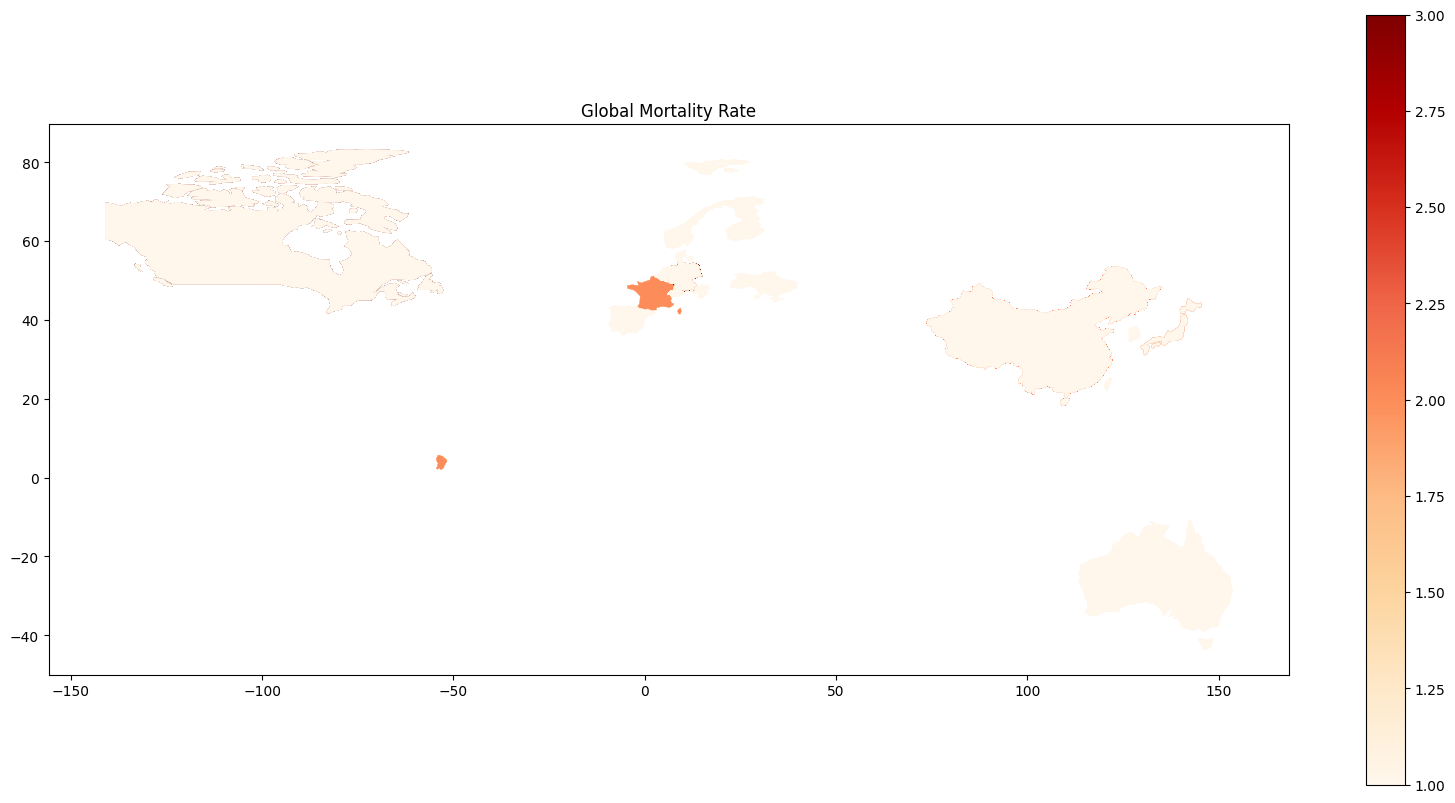

In [ ]:

world = world.merge(mortality_data, how='left', left_on='name', right_on='Country')



print(world[['name', 'Country', 'Deaths']].head())



world.plot(column='Deaths', legend=True, cmap='OrRd')
plt.title('Global Mortality Rate')
plt.show()

In [ ]:
print(mortality_data.columns)

mortality_data.columns = mortality_data.columns.str.strip()

# 再次确认
print(mortality_data.columns)

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')
Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


In [ ]:
print(world.columns)

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')


In [ ]:
mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.strip()

print(mortality_data['Country'].head())
print(world['name'].head())

0    Germany
1        USA
2    Finland
3        USA
4        USA
Name: Country, dtype: object
0                        Fiji
1                    Tanzania
2                   W. Sahara
3                      Canada
4    United States of America
Name: name, dtype: object


In [ ]:
mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.strip()

print(mortality_data.columns)
print(mortality_data.head())

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')
   Case #  Year       Date  Country State  \
0     254  2022  8/16/2022  Germany   NaN   
1     253  2022  8/15/2022      USA    CA   
2     252  2022  8/14/2022  Finland   NaN   
3     251  2022   8/2/2022      USA    FL   
4     250  2022  7/27/2022      USA    ME   

                             Description  Deaths Tesla driver Tesla occupant  \
0    Tesla car crashes into tree, burns        2          NaN            NaN   
1     Tesla veers into oncoming traffic        4            1              3   
2     Unlicensed driver hits pedestrian        1           -              -    
3   Man in wheelchair hit crossing road        1     

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/1435132537.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


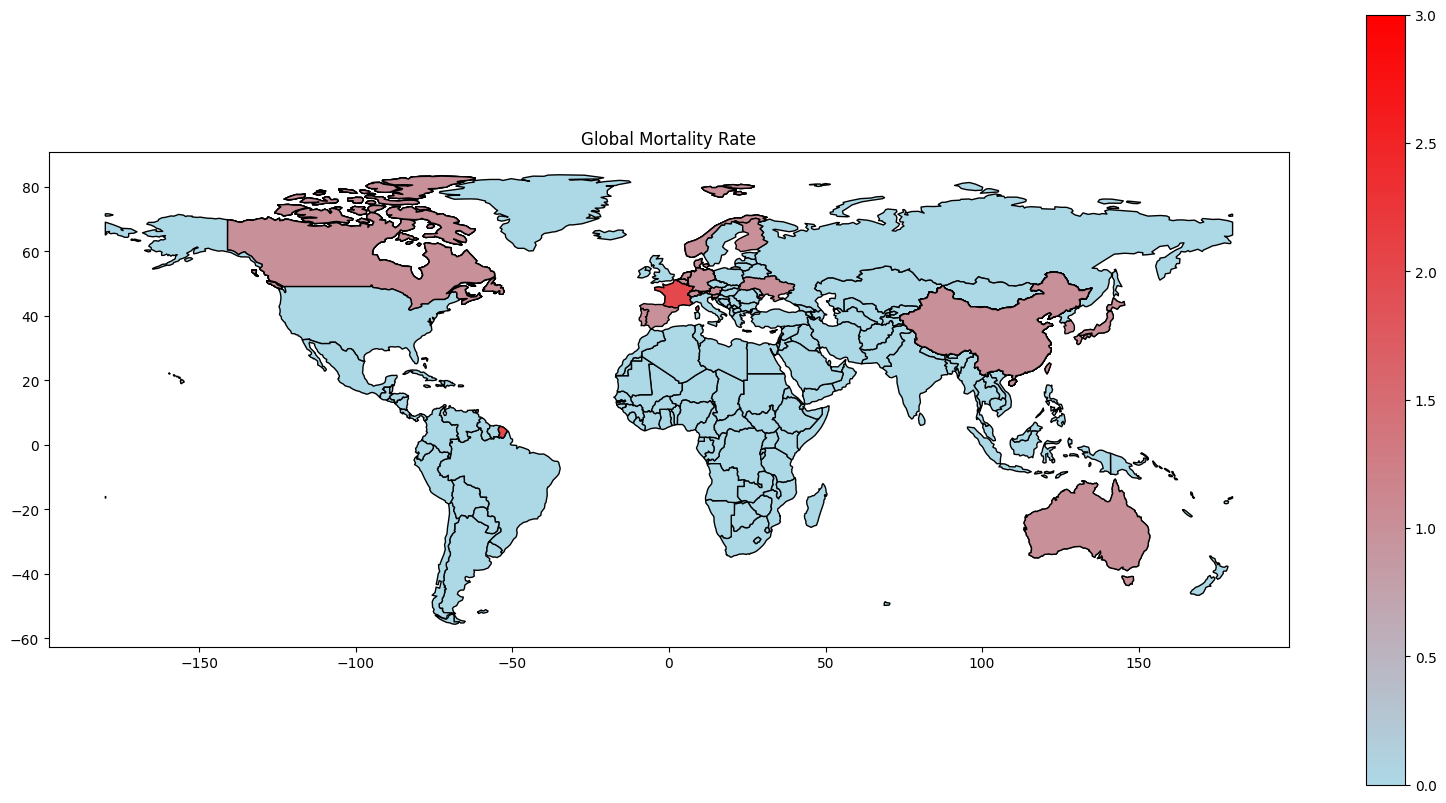

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

mortality_data = pd.read_csv("Tesla_Dealth.csv")

mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.strip()

# 读取世界地图数据
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# 过滤掉南极洲，确保只有实际有数据的国家
world = world[(world.name != "Antarctica")]

# 合并世界地图数据与 CSV 数据
# 假设 world 中国家名称的列为 'name'，CSV 中国家名称的列为 'Country'
world = world.merge(mortality_data, how = 'left', left_on = 'name', right_on = 'Country' )

# 假设 CSV 中你想显示的数据列为 'Deaths'
# 如果需要显示其他列，可以替换 'Deaths' 为其他列名
world['mortality_data'] = world['Deaths']  # 或者根据你 CSV 的列名

world['Deaths'] = world['Deaths'].fillna(0)

colors = ["#ADD8E6", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

Normalize(vmin=0, vmax=world['Deaths'].max())

# 绘制地图
world.plot(column='Deaths', cmap=cmap, norm=norm, legend=True, edgecolor='black')
plt.title('Global Mortality Rate')
plt.show()

# Making maps

![All the suburbs in Sydney](all_burbs.png)

We're going to get some shapefiles from data.gov.au, and then we're going to draw some maps

---

You'll need some prequisite libraries.

**NOTE: this mac method might well apply to you on a PC these days too. They've updated the libraries.**

If you're on a mac, it's easy, just do this:
```
pip install pandas shapely fiona descartes pyproj 
pip install geopandas
```
You may have some already but pip will be cool with that.

If that works for you, ignore these next steps.

---

If you are on windows, and the steps above didn't work out for you, geopandas is installed differently, so follow these 3 steps:

1. Install Visual CPPD Build Tools with the following link: https://visualstudio.microsoft.com/visual-cpp-build-tools/
2. Restart your computer
3. Open Visual Studio Code again after the restart and copy and paste the following commands into your terminal:

    ```
    pip install wheel
    pip install pipwin
    pip install numpy
    pip install pandas
    pip install shapely
    pip install pyproj
    pip install six
    pip install rtree
    pipwin install gdal
    pipwin install fiona
    pip install descartes
    pip install geopandas
    ```

Copy that whole lot into your terminal, press enter, and it'll sort it out.

--- 

We're going to get a shapefile of suburb boundaries from here:

https://data.gov.au/dataset/ds-dga-91e70237-d9d1-4719-a82f-e71b811154c6/details

In [ ]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = r"world-administrative-boundaries.shp"
zip_file_name = "world-administrative-boundaries.zip"



In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

To get a load of shape files from data.gov.au, more specifically, [here](https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries/resource/bf8b5180-fcea-44bd-bd76-af14cc4b0fe0)

In [ ]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [ ]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


#### Shapefiles are the format that a lot of GIS tools use.

#### GIS means Geographic Information System

pronounced: _gee eye ess_

not pronounced: _jizz_

In [ ]:
burbs = gp.read_file(shp_file_name) 
#gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
194,MTQ,FR Territory,FRA,Martinique,Americas,Caribbean,MQ,Martinique,"POLYGON ((-60.817 14.473, -60.821 14.456, -60...."
211,SVN,Member State,SVN,Slovenia,Europe,Southern Europe,SI,Slovénie,"POLYGON ((16.608 46.476, 16.592 46.474, 16.564..."
141,None,Adm. by KEN,SDN,Ilemi Triangle,Africa,Northern Africa,None,Ilemi Triangle,"POLYGON ((35.925 4.640, 35.948 4.629, 35.948 4..."
126,STP,Member State,STP,Sao Tome and Principe,Africa,Middle Africa,ST,Sao Tomé-et-Principe,"MULTIPOLYGON (((6.562 0.027, 6.524 0.018, 6.51..."
247,ATG,Member State,ATG,Antigua & Barbuda,Americas,Caribbean,AG,Antigua-et-Barbuda,"MULTIPOLYGON (((-61.685 17.026, -61.738 16.990..."
65,LKA,Member State,LKA,Sri Lanka,Asia,Southern Asia,LK,Sri Lanka,"MULTIPOLYGON (((79.912 9.020, 79.895 8.987, 79..."
151,BRB,Member State,BRB,Barbados,Americas,Caribbean,BB,Barbade,"POLYGON ((-59.510 13.055, -59.533 13.051, -59...."
120,MWI,Member State,MWI,Malawi,Africa,Eastern Africa,MW,Malawi,"POLYGON ((34.967 -11.572, 34.958 -11.572, 34.8..."
208,LCA,Member State,LCA,Saint Lucia,Americas,Caribbean,LC,Sainte-Lucie,"POLYGON ((-60.900 13.778, -60.938 13.718, -60...."
232,TWN,CN Province,CHN,Taiwan,Asia,Eastern Asia,TW,Taiwan,"MULTIPOLYGON (((118.421 24.398, 118.287 24.390..."


There are a bunch of junk columns in there. Normally I'd leave them in, but because we're going to be looking are this data in dataframes, I'll take them out so that it's easier on the eyes.

In [ ]:
cols_to_drop = ["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(300)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.921 -1.002, 33.920 -1.001, 33.461..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.971 42.255, 70.981 42.262, 71.033..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.970 54.021, -9.938 53.995, ..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.136 15.753, 40.129 15.732, ..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.244 -58.495, -26.249 -58.4..."
...,...,...,...,...,...,...,...,...,...
251,BEL,Member State,BEL,Belgium,Europe,Western Europe,BE,Belgique,"POLYGON ((6.012 50.757, 6.055 50.724, 6.167 50..."
252,WSM,Member State,WSM,Samoa,Oceania,Polynesia,WS,Samoa,"MULTIPOLYGON (((-171.429 -14.016, -171.442 -14..."
253,AIA,UK Non-Self-Governing Territory,AIA,Anguilla,Americas,Caribbean,AI,Anguilla,"POLYGON ((-63.154 18.165, -63.168 18.164, -63...."
254,ISR,Member State,ISR,Israel,Asia,Western Asia,IL,Israël,"POLYGON ((35.624 33.246, 35.632 33.246, 35.660..."


Only uncomment this if you've got a fast computer and a lot of time!

It makes the map at the top of this file.

In [ ]:
# burbs.geometry.plot()

In [ ]:
shp_file_path = 'world-administrative-boundaries.shp'  # 确认文件名和路径正确

# 尝试读取形状文件
try:
    gdf = gp.read_file(shp_file_path)
    print("Shapefile loaded successfully.")
    print(gdf.head())
except Exception as e:
    print(f"Error loading shapefile: {e}")
    gdf = None

if gdf is not None:
    # 读取你的死亡数据
    csv_file_path = 'Tesla_Dealth.csv'  # 确保路径正确
    try:
        penalty_data = pd.read_csv(csv_file_path)
        print("CSV file loaded successfully.")
        print(penalty_data.head())
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        penalty_data = None

    if penalty_data is not None:
        # 确保数据框中包含'Country'和'Deaths'列
        if 'Country' in penalty_data.columns and 'Deaths' in penalty_data.columns:
            # 按国家分组并计算每个国家的死亡人数总和
            country_deaths = penalty_data.groupby('Country')['Deaths'].sum().reset_index()

            # 将数据框转换为GeoDataFrame
            geo_data = gdf.set_index('name').join(country_deaths.set_index('Country'))

            # 绘制地图
            fig, ax = plt.subplots(1, 1, figsize=(15, 10))
            geo_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

            plt.title('Number of Deaths by Country')
            plt.show()
        else:
            print("The dataframe does not contain 'Country' or 'Deaths' column.")
else:
    print("Shapefile could not be loaded.")

Shapefile loaded successfully.
   iso3        status color_code                                        name  \
0   UGA  Member State        UGA                                      Uganda   
1   UZB  Member State        UZB                                  Uzbekistan   
2   IRL  Member State        IRL                                     Ireland   
3   ERI  Member State        ERI                                     Eritrea   
4  None  UK Territory        GBR  South Georgia & the South Sandwich Islands   

    continent           region iso_3166_1_  \
0      Africa   Eastern Africa          UG   
1        Asia     Central Asia          UZ   
2      Europe  Northern Europe          IE   
3      Africa   Eastern Africa          ER   
4  Antarctica             None        None   

                                  french_shor  \
0                                     Ouganda   
1                                 Ouzbékistan   
2                                     Irlande   
3              

Let's pull out a single row, a single suburb, and look at it.

iso3                                                         UGA
status                                              Member State
color_code                                                   UGA
name                                                      Uganda
continent                                                 Africa
region                                            Eastern Africa
iso_3166_1_                                                   UG
french_shor                                              Ouganda
geometry       POLYGON ((33.92110000000008 -1.001939999999933...
centroid            POINT (32.38621827281175 1.2799634451787583)
Name: 0, dtype: object


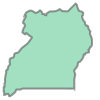

In [244]:
a = burbs.iloc[0]
print(a)
a.geometry

When we plot a geopandas polygon\* it actually draws it, rather than showing the textual information, which is nice.

\* it's acutally a Shapely polygon I think.

---

If we want to measure some distances, we need _points_. The distance between two shapes is ambiguous.

The easiest way to do this is to get the centroid of the polygon.

In [245]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(256)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,centroid
105,EGY,Member State,EGY,Egypt,Africa,Northern Africa,EG,Égypte,"POLYGON ((34.217 31.323, 34.239 31.295, 34.268...",POINT (29.79020 26.55378)
125,AFG,Member State,AFG,Afghanistan,Asia,Southern Asia,AF,Afghanistan,"POLYGON ((74.916 37.237, 74.809 37.224, 74.773...",POINT (66.02647 33.83881)
55,CPV,Member State,CPV,Cape Verde,Africa,Western Africa,CV,Cabo Verde,"MULTIPOLYGON (((-24.366 14.813, -24.390 14.811...",POINT (-23.96778 15.97897)
187,VCT,Member State,VCT,Saint Vincent and the Grenadines,Americas,Caribbean,VC,Saint-Vincent-et-les Grenadines,"POLYGON ((-61.170 13.134, -61.184 13.130, -61....",POINT (-61.19377 13.25481)
87,MRT,Member State,MRT,Mauritania,Africa,Western Africa,MR,Mauritanie,"MULTIPOLYGON (((-16.427 19.604, -16.432 19.601...",POINT (-10.33230 20.25985)
...,...,...,...,...,...,...,...,...,...,...
196,SWE,Member State,SWE,Sweden,Europe,Northern Europe,SE,Suède,"MULTIPOLYGON (((16.437 56.211, 16.430 56.209, ...",POINT (16.73975 62.78990)
144,None,Sovereignty unsettled,IND,Arunachal Pradesh,Asia,Eastern Asia,None,Arunachal Pradesh,"POLYGON ((97.349 28.223, 97.334 28.166, 97.317...",POINT (94.35043 28.12124)
32,ABW,NL Territory,ABW,Aruba,Americas,Caribbean,AW,Aruba,"POLYGON ((-69.875 12.415, -69.882 12.411, -69....",POINT (-69.97564 12.51563)
251,BEL,Member State,BEL,Belgium,Europe,Western Europe,BE,Belgique,"POLYGON ((6.012 50.757, 6.055 50.724, 6.167 50...",POINT (4.66399 50.64285)


And we can plot this nicely as a map. Note that this is different to doing a `scatter` of lat and long because it's aware that they're spatially related; no squishing.

<Axes: >

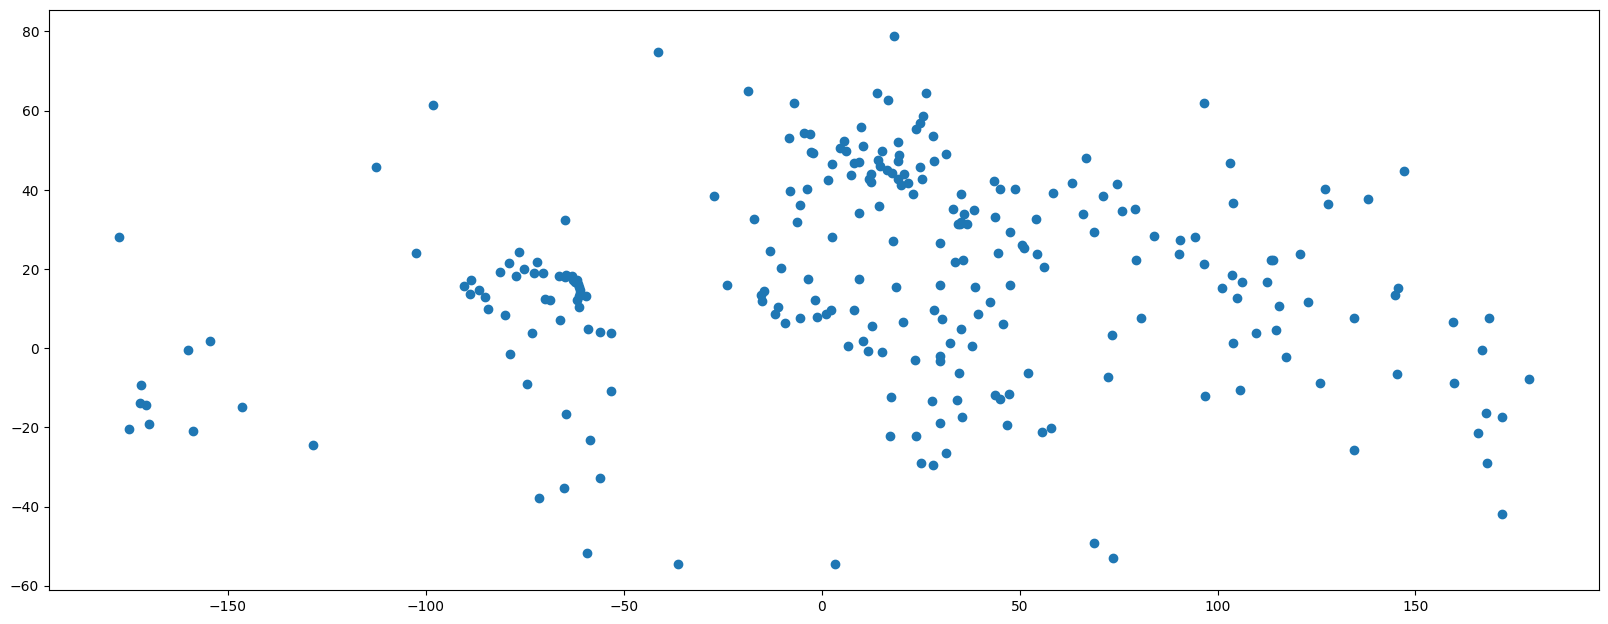

In [246]:
burbs.centroid.plot()

In [247]:
print(base_map.crs)
print(burbs.crs)

EPSG:3395
EPSG:5234


In [248]:
burbs = burbs.to_crs(base_map.crs)

In [249]:
print(burbs.total_bounds)  # 这将返回数据框的地理边界
print(base_map.total_bounds)

[8790704.57859089  574568.33754704 8791066.15616038  574710.9646721 ]
[-20037507.22959432  -8036333.03571921  20037507.22959434
  18375858.71866915]


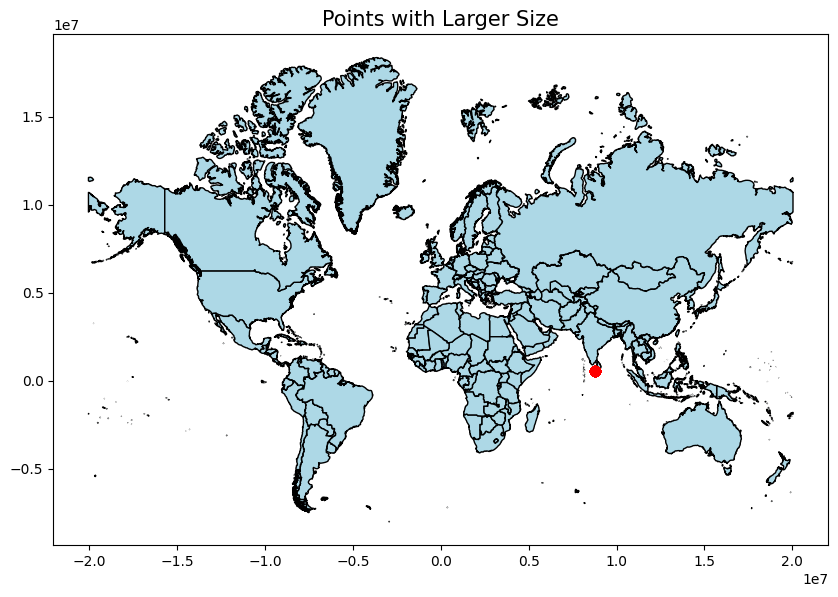

In [250]:
ax = base_map.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

# 调整点的大小
burbs.centroid.plot(ax=ax, color='red', markersize=50, alpha=0.3)

plt.title('Points with Larger Size', fontsize=15)
plt.show()


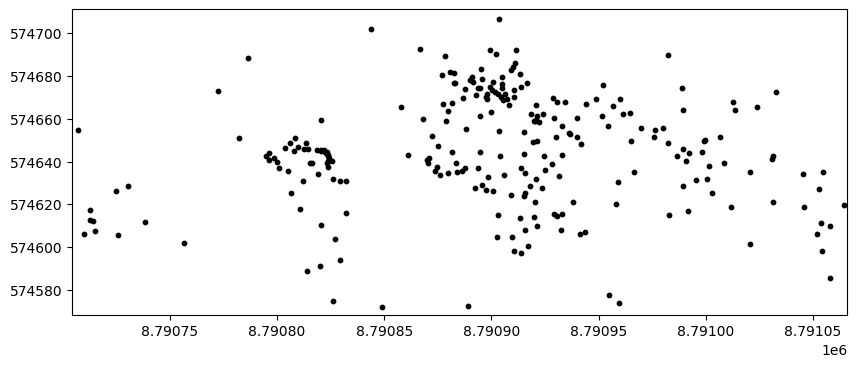

In [251]:
ax = base_map.plot(figsize=(10, 10), color='lightblue')
burbs.centroid.plot(ax=ax, color='black', markersize=10)

# 设置地图的显示范围为burbs的范围
ax.set_xlim(burbs.total_bounds[0], burbs.total_bounds[2])
ax.set_ylim(burbs.total_bounds[1], burbs.total_bounds[3])

plt.show()

In [241]:
mortality_data.columns = mortality_data.columns.str.strip()

In [243]:
if 'Country' in mortality_data.columns:
    print("Country 列存在")
else:
    print("Country 列不存在")

Country 列不存在


In [242]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


# 读取CSV数据
mortality_data = pd.read_csv('Tesla_Dealth.csv')


# 检查CSV中是否有国家列，并确保与世界地图中的国家名称匹配
# 合并数据，假设CSV中的国家列名为 'Country'
merged_data = world.merge(mortality_data, how='left', left_on='name', right_on='Country')

# 设置默认死亡数据为0
merged_data['Deaths'] = merged_data['Deaths'].fillna(0)

# 绘制地图，并将死亡数据作为颜色映射
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='Deaths', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 设置标题
plt.title('Global Tesla Mortality Map')
plt.show()

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/925571147.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


KeyError: 'Country'

In [ ]:
mortality_data = pd.read_csv('Tesla_Dealth.csv')

# 如果没有 `geometry` 列，且有经纬度信息
if 'Longitude' in mortality_data.columns and 'Latitude' in mortality_data.columns:
    mortality_data_gdf = gp.GeoDataFrame(
        mortality_data, 
        geometry=gp.points_from_xy(mortality_data['Longitude'], mortality_data['Latitude'])
    )
else:
    print("无法找到 'Longitude' 和 'Latitude' 列，请检查你的数据框。")

# 设置坐标参考系 (CRS)
mortality_data_gdf = mortality_data_gdf.set_crs(epsg=4326)

# 读取世界地图数据
world = gp.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 转换世界地图为相同的坐标参考系
world = world.to_crs(epsg=4326)

# 绘制地图
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='black')

# 绘制点图
mortality_data_gdf.plot(ax=ax, color='red', markersize=5)

plt.show()


无法找到 'Longitude' 和 'Latitude' 列，请检查你的数据框。


NameError: name 'mortality_data_gdf' is not defined

In [ ]:
# 假设已经读取了CSV文件，并且已经在其中包含了几何数据
mortality_data = pd.read_csv('Tesla_Dealth.csv')

# 创建GeoDataFrame
# 假设你已经知道如何从你的数据中创建几何点
mortality_data_gdf = gp.GeoDataFrame(mortality_data, Geometry = mortality_data['geometry'])

# 设置坐标参考系 (CRS)
mortality_data_gdf = mortality_data_gdf.set_crs(epsg=4326)

# 读取世界地图数据
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# 转换世界地图为相同的坐标参考系
world = world.to_crs(epsg=4326)

# 绘制地图
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='black')

# 绘制点图
mortality_data_gdf.plot(ax=ax, color='red', markersize=5)

plt.show()

KeyError: 'geometry'

In [ ]:
# 使用Mercator投影
burbs_projected = burbs.to_crs(epsg=3395)
base_map_projected = base_map.to_crs(epsg=3395)

In [ ]:
print(burbs.centroid)

0      POINT (78.97016 5.18956)
1      POINT (78.97044 5.18993)
2      POINT (78.96979 5.19003)
3      POINT (78.97022 5.18969)
4      POINT (78.96954 5.18905)
                 ...           
251    POINT (78.96991 5.19000)
252    POINT (78.96832 5.18942)
253    POINT (78.96930 5.18971)
254    POINT (78.97018 5.18983)
255    POINT (78.97003 5.18979)
Length: 256, dtype: geometry


/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/2035617467.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(burbs.centroid)


/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_3167/3626134672.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  burbs.centroid.plot(ax=ax, color='black', markersize=1)


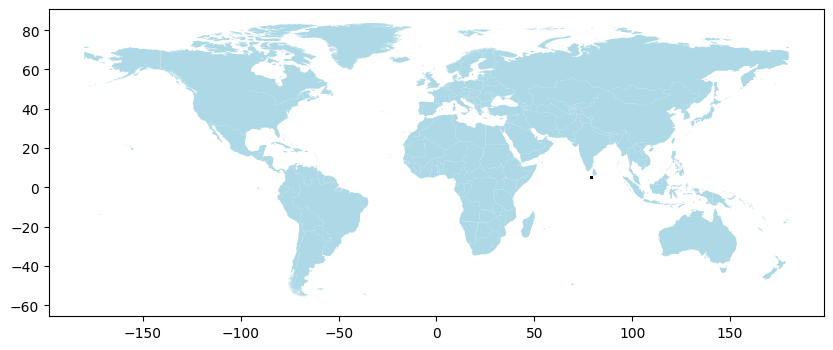

In [ ]:
ax = base_map.plot(figsize=(10, 10), color='lightblue')
burbs.centroid.plot(ax=ax, color='black', markersize=1)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

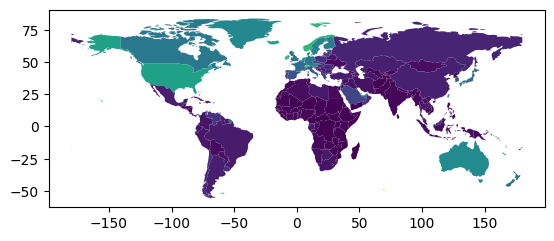

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')

POINT (32.38621827281175 1.2799634451787583)


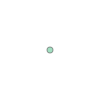

In [ ]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

Let's make a new point that's on the UNSW campus. We need to use shapely to do this.

Then calculate the distance from that point to the centroid of each suburb.

In [ ]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

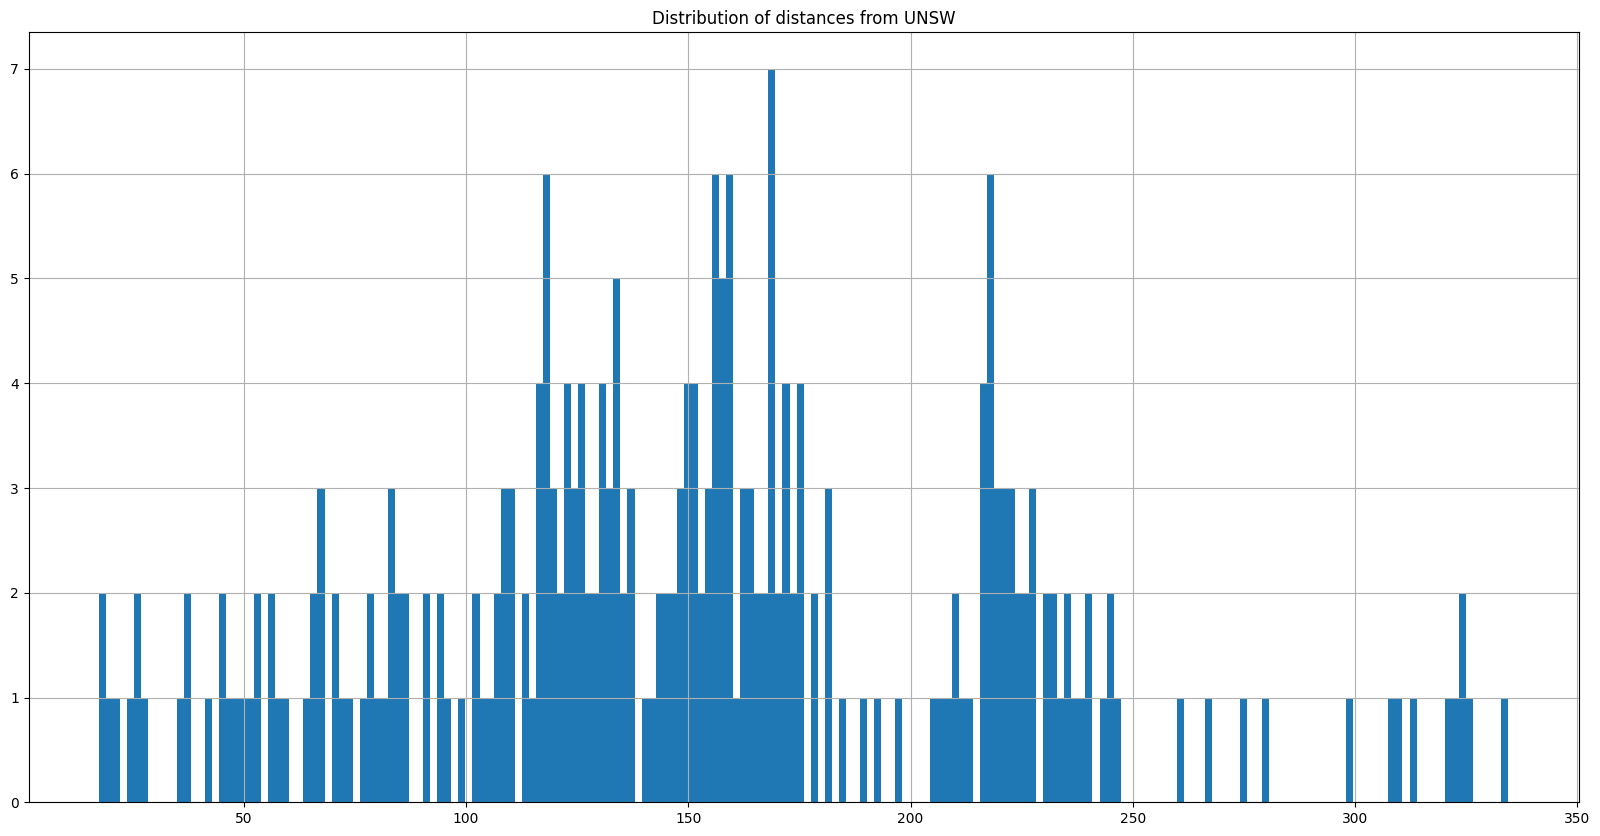

In [ ]:
burbs.distance_from_UNSW.hist(bins=200)
plt.title("Distribution of distances from UNSW");

This gives distance in whole numbers of lat long I think, i.e. degrees!

Not really sure what to do with that, but let's get rid of everything above 0.2 and see what we can plot:

In [ ]:
close_burbs = burbs[burbs.distance_from_UNSW < 0.05]
close_burbs.plot();

AttributeError: 'GeoDataFrame' object has no attribute 'distance_from_UNSW'

We can simplify shapes in a few ways:

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1899958956.py:1: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  close_burbs.geometry.convex_hull.plot();


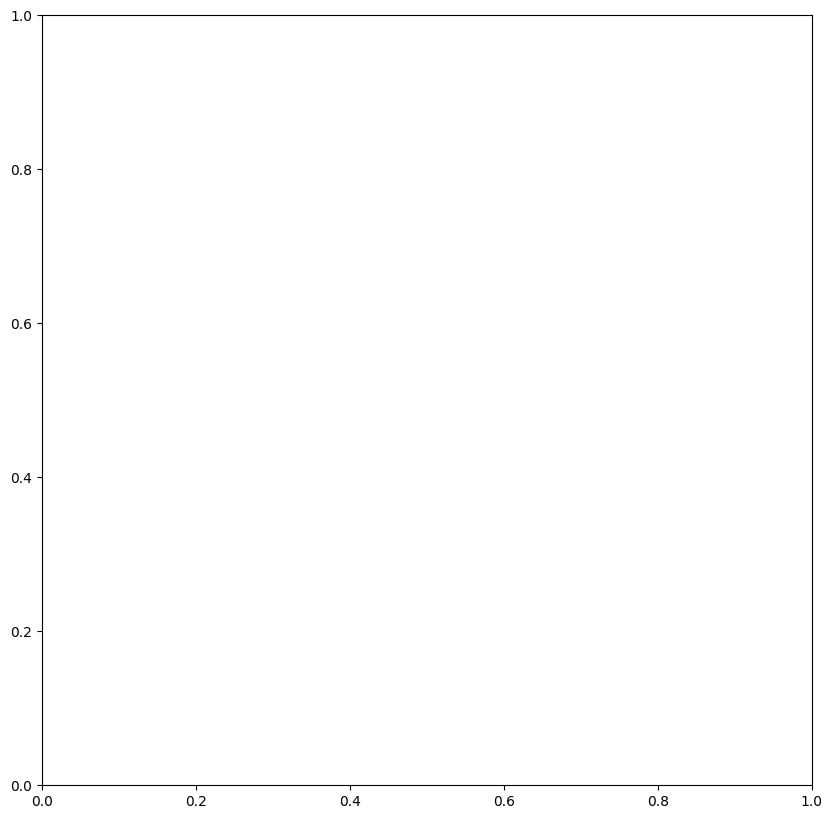

In [ ]:
close_burbs.geometry.convex_hull.plot();

In [ ]:
close_burbs.geometry.envelope.plot();

NameError: name 'close_burbs' is not defined

![](http://www.personal.kent.edu/~rmuhamma/Compgeometry/MyCG/Gifs-CompGeometry/ch2.gif)

Convex hulls are a useful aproximation if you want to do fast calculations.

You can use this to speed up calculations sometimes. It goes radius, bounding box, convex hull, complex polygon. I.e. if the points are not within radius_1 + radius_2 of each other, there's no point doing any other checks.

Often it's faster to do all of these checks in order, flowing from one to the next, than it is to just go straight to the most complex. But that depends on how much effort you can be bothered to put in.

What about putting labels on the map?

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/2618020105.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot()


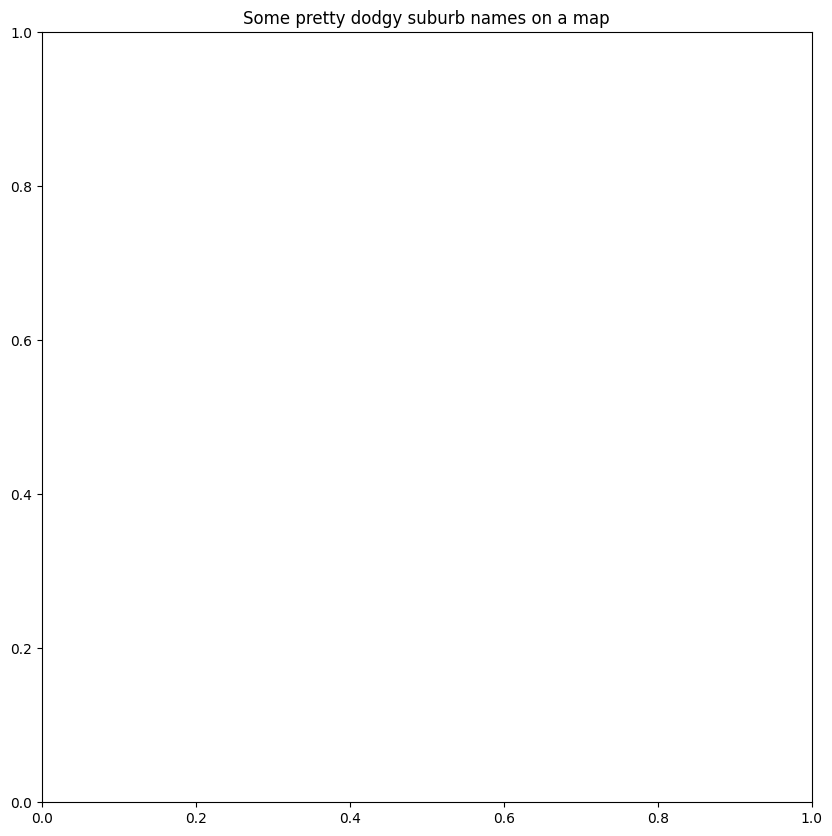

In [ ]:
really_close_burbs = burbs[burbs.distance_from_UNSW < 0.03]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
#     print(idx, row)
#     print("annotation", row.NSW_LOCA_2)
#     print("coords", row.centroid.coords, 
#           "tup", tuple(row.centroid.coords), 
#           "zero", tuple(row.centroid.coords)[0])
    plt.annotate(text=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");

We often want to be able to tell if a point is in a suburb or not. We'd do that with a polygon inclusion test.

![](http://www.geeksforgeeks.org/wp-content/uploads/polygon31.png)

[How to check if a given point lies inside or outside a polygon?](http://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/)

Luckily we've got one built in!

In [ ]:
print(right_here)
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


This might actually be a case where a `lambda` is a good idea:

In [ ]:
in_this_burb = really_close_burbs[really_close_burbs.geometry.apply(lambda x: right_here.within(x))]
in_this_burb

""


This is useful if you need to get the suburb name of some points. You'd check each point to see if it's in each suburb, and if it is, you've got it. Careful though, that's a O(n²) job.

How about colouring suburbs according to some kind of scalar value?

[That's called a _chloropleth_](http://geopandas.readthedocs.io/en/latest/mapping.html?highlight=color#chloropleth-maps)

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/616953112.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True);


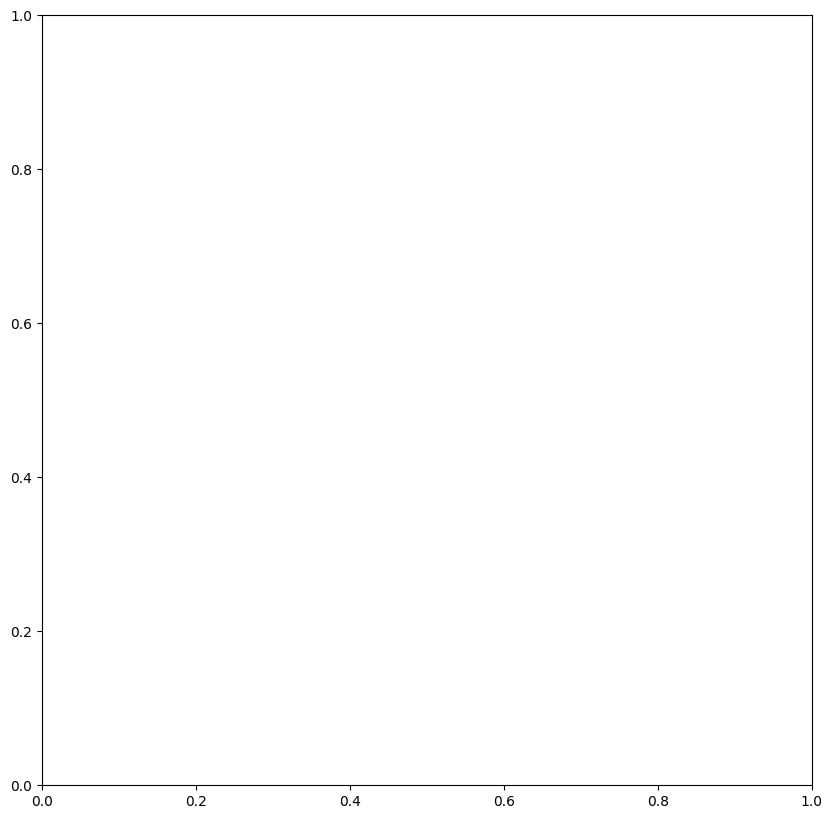

In [ ]:
really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True);

I don't think that could be any easier!

You can see the list of [colour scale options here](http://matplotlib.org/users/colormaps.html)

What if you want to put some points onto the map? In this case we'll plot the centroids, but you can plot any points because they are using geographic coordinates.

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1931185165.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True)
/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1931185165.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.centroid.plot(ax=ax)


<Axes: >

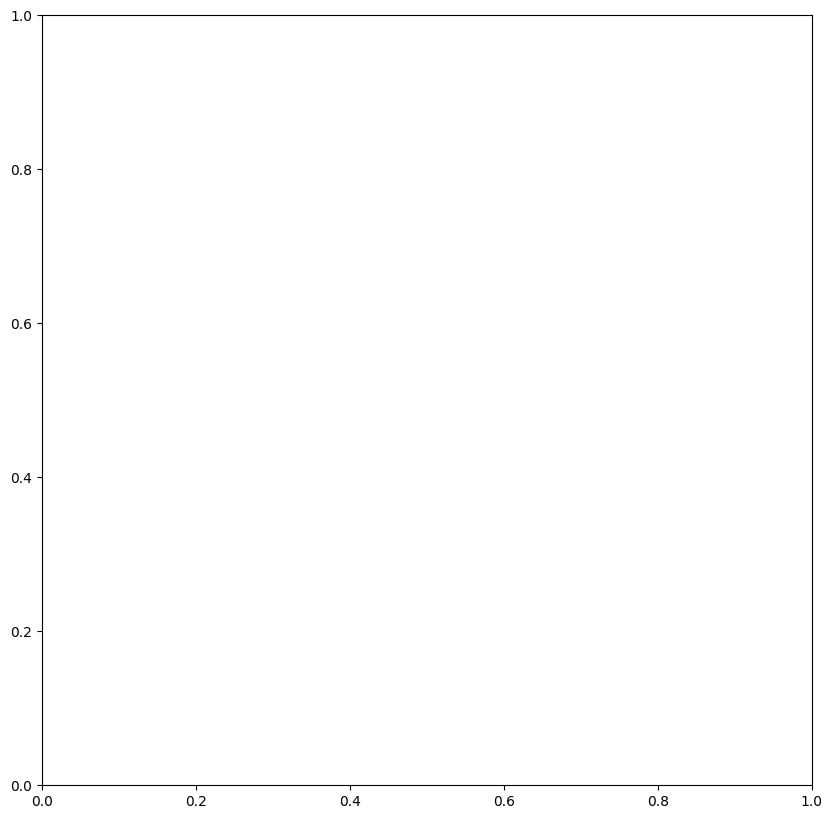

In [ ]:
ax = really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True)
really_close_burbs.centroid.plot(ax=ax)

## Handy links

* [Geopandas docs](http://geopandas.readthedocs.io)
* [Geopandas on GitHib](https://github.com/geopandas/geopandas)
* [Another map making tutorial](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html)
* [MatPlotLib colour scale options](http://matplotlib.org/users/colormaps.html)

I'd love to hear if you come across any other useful things!

POINT (32.38621827281175 1.2799634451787583)


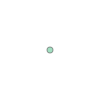

In [ ]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

Let's make a new point that's on the UNSW campus. We need to use shapely to do this.

Then calculate the distance from that point to the centroid of each suburb.

In [ ]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

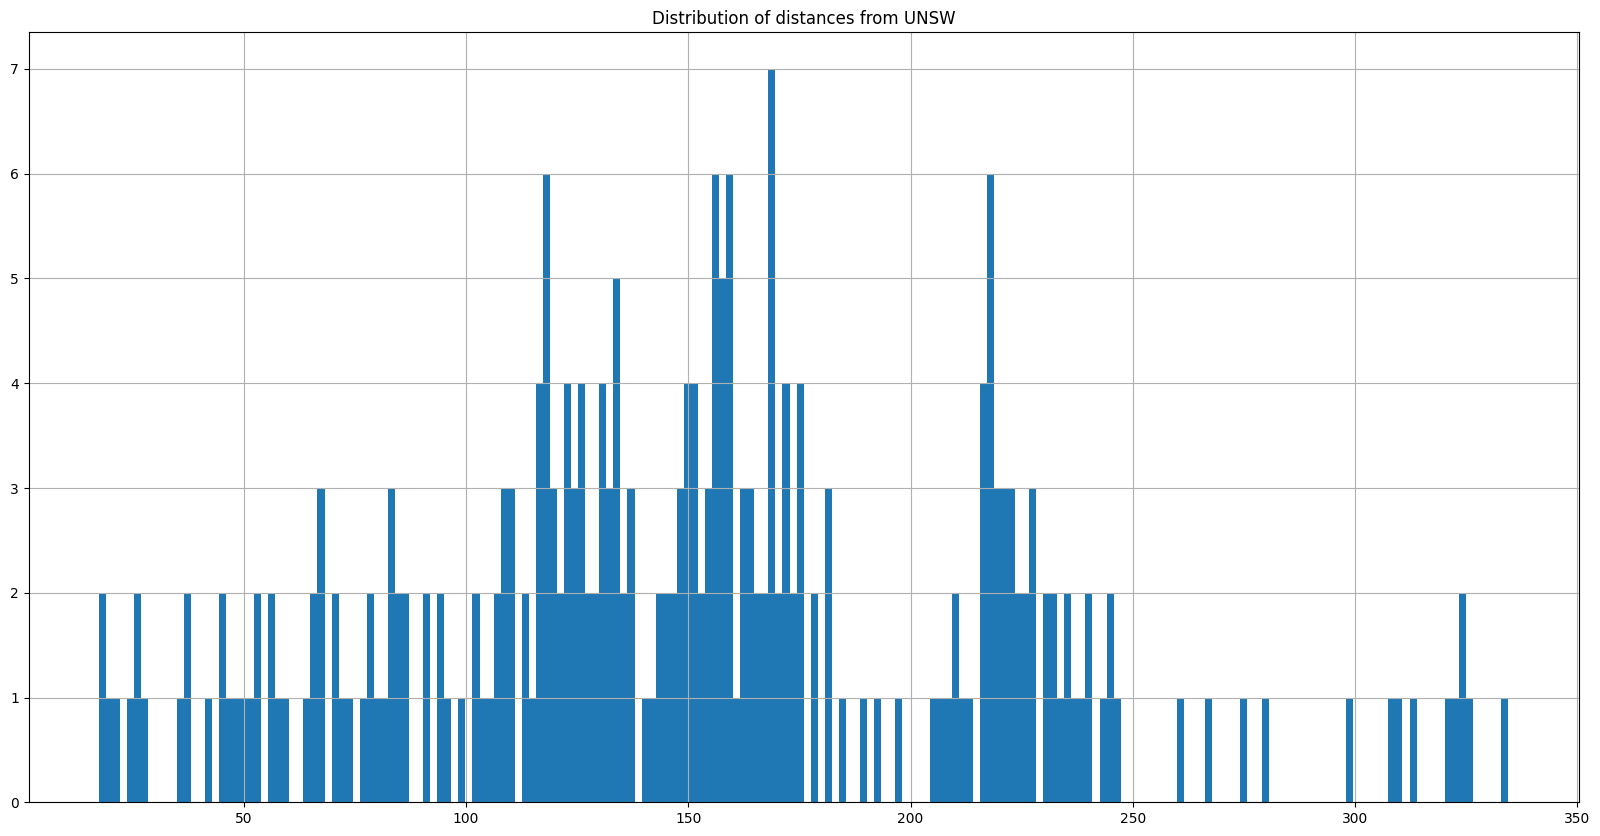

In [ ]:
burbs.distance_from_UNSW.hist(bins=200)
plt.title("Distribution of distances from UNSW");

This gives distance in whole numbers of lat long I think, i.e. degrees!

Not really sure what to do with that, but let's get rid of everything above 0.2 and see what we can plot:

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/3136797694.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  close_burbs.plot();


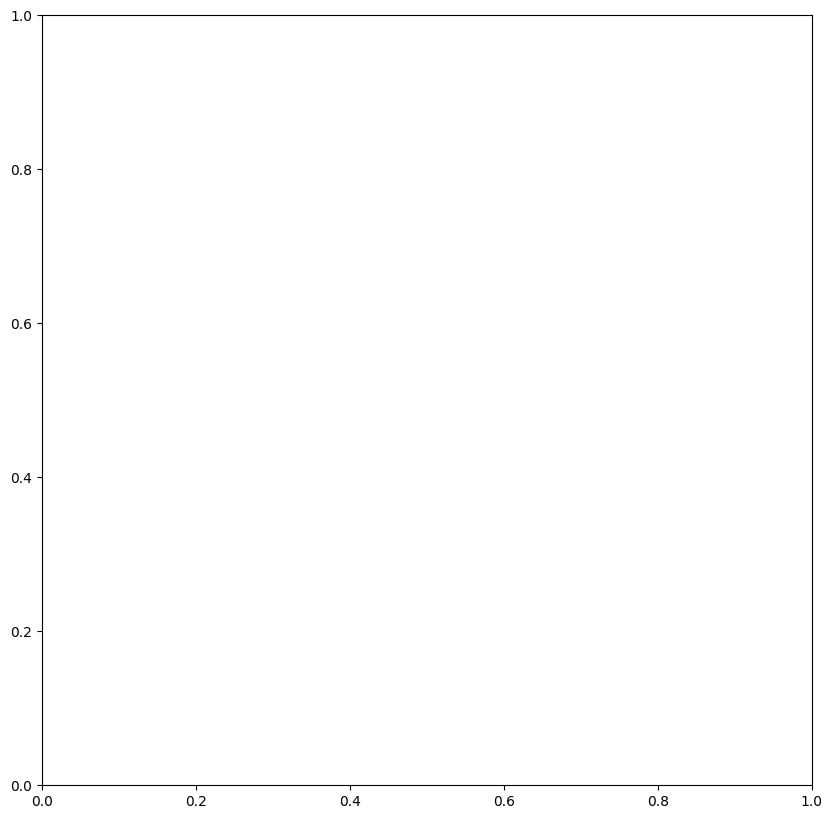

In [ ]:
close_burbs = burbs[burbs.distance_from_UNSW < 0.05]
close_burbs.plot();

We can simplify shapes in a few ways:

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1899958956.py:1: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  close_burbs.geometry.convex_hull.plot();


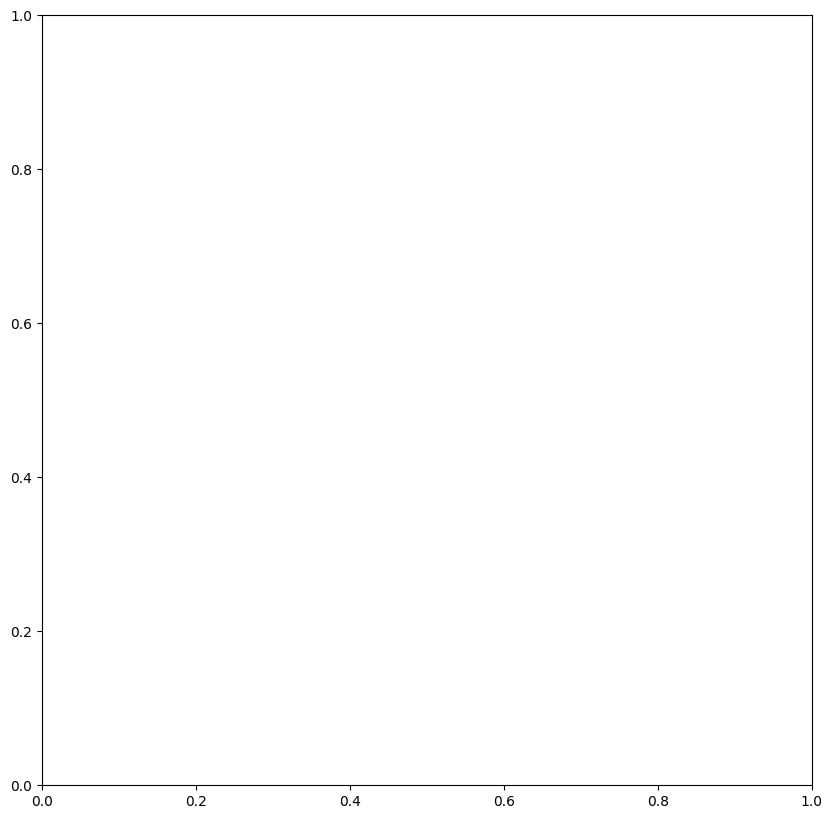

In [ ]:
close_burbs.geometry.convex_hull.plot();

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/3934384802.py:1: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  close_burbs.geometry.envelope.plot();


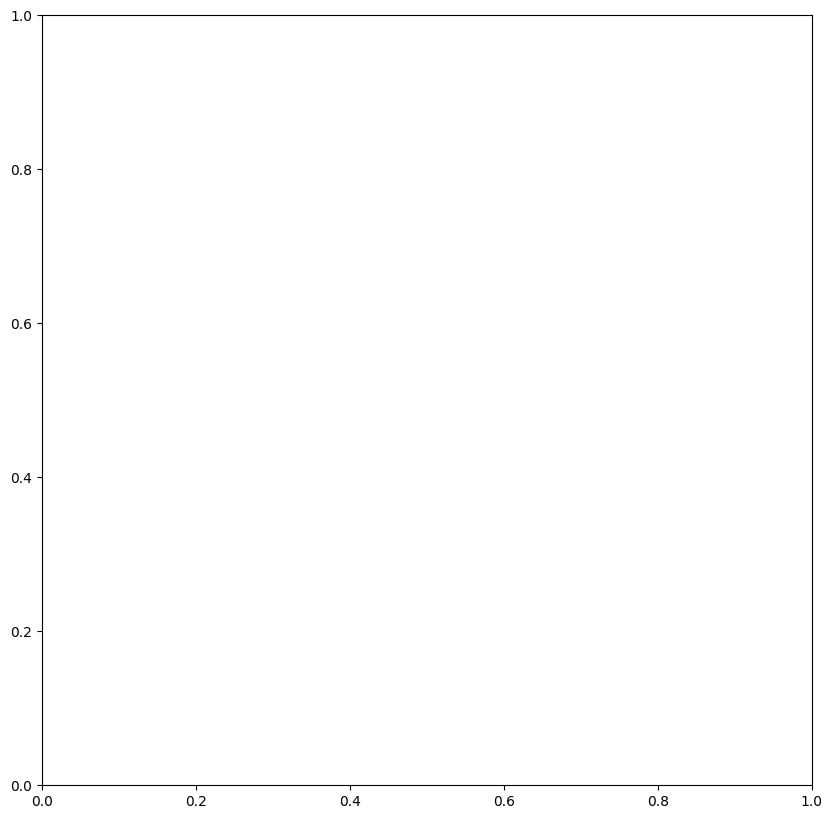

In [ ]:
close_burbs.geometry.envelope.plot();

![](http://www.personal.kent.edu/~rmuhamma/Compgeometry/MyCG/Gifs-CompGeometry/ch2.gif)

Convex hulls are a useful aproximation if you want to do fast calculations.

You can use this to speed up calculations sometimes. It goes radius, bounding box, convex hull, complex polygon. I.e. if the points are not within radius_1 + radius_2 of each other, there's no point doing any other checks.

Often it's faster to do all of these checks in order, flowing from one to the next, than it is to just go straight to the most complex. But that depends on how much effort you can be bothered to put in.

What about putting labels on the map?

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/2618020105.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot()


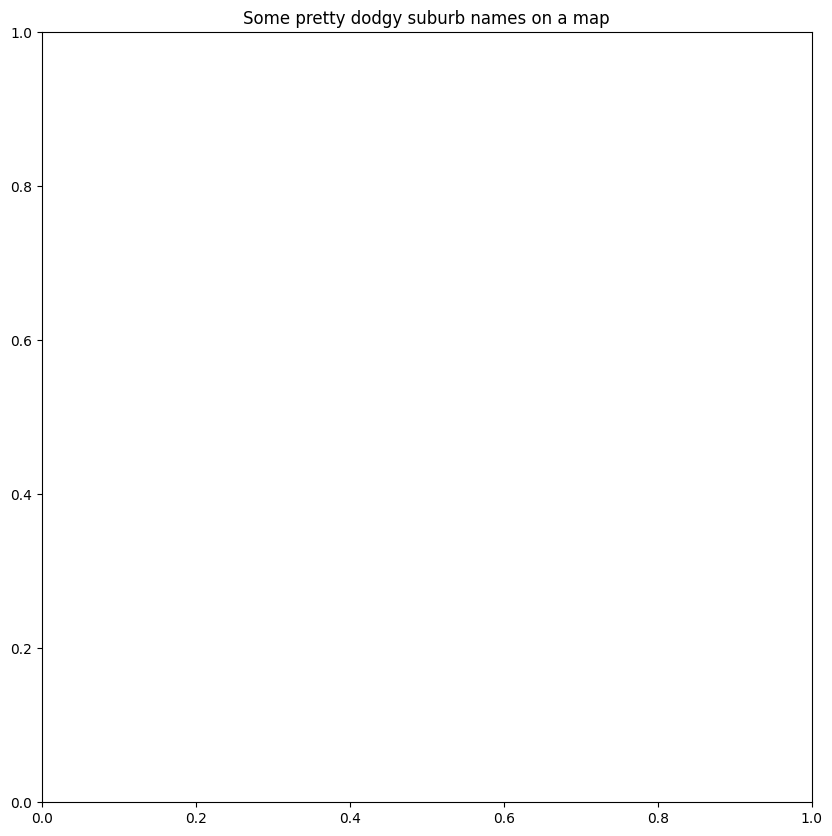

In [ ]:
really_close_burbs = burbs[burbs.distance_from_UNSW < 0.03]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
#     print(idx, row)
#     print("annotation", row.NSW_LOCA_2)
#     print("coords", row.centroid.coords, 
#           "tup", tuple(row.centroid.coords), 
#           "zero", tuple(row.centroid.coords)[0])
    plt.annotate(text=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");

We often want to be able to tell if a point is in a suburb or not. We'd do that with a polygon inclusion test.

![](http://www.geeksforgeeks.org/wp-content/uploads/polygon31.png)

[How to check if a given point lies inside or outside a polygon?](http://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/)

Luckily we've got one built in!

In [ ]:
print(right_here)
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


This might actually be a case where a `lambda` is a good idea:

In [ ]:
in_this_burb = really_close_burbs[really_close_burbs.geometry.apply(lambda x: right_here.within(x))]
in_this_burb

""


This is useful if you need to get the suburb name of some points. You'd check each point to see if it's in each suburb, and if it is, you've got it. Careful though, that's a O(n²) job.

How about colouring suburbs according to some kind of scalar value?

[That's called a _chloropleth_](http://geopandas.readthedocs.io/en/latest/mapping.html?highlight=color#chloropleth-maps)

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/616953112.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True);


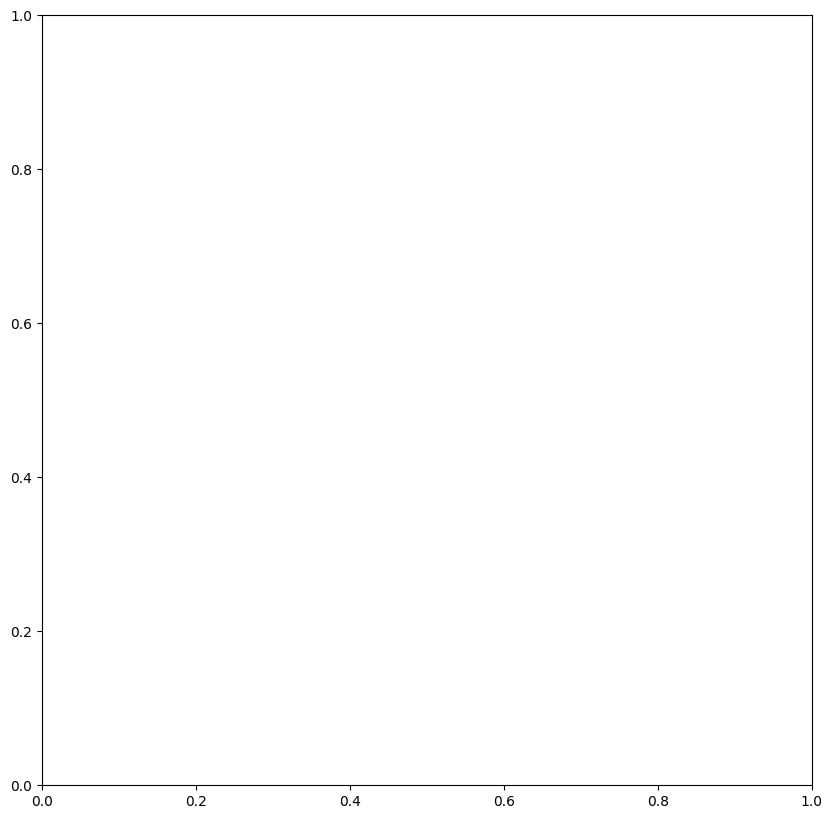

In [ ]:
really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True);

I don't think that could be any easier!

You can see the list of [colour scale options here](http://matplotlib.org/users/colormaps.html)

What if you want to put some points onto the map? In this case we'll plot the centroids, but you can plot any points because they are using geographic coordinates.

/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1931185165.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True)
/var/folders/h3/d7_y_jt95fg5wyh6zcclk7n80000gn/T/ipykernel_56841/1931185165.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.centroid.plot(ax=ax)


<Axes: >

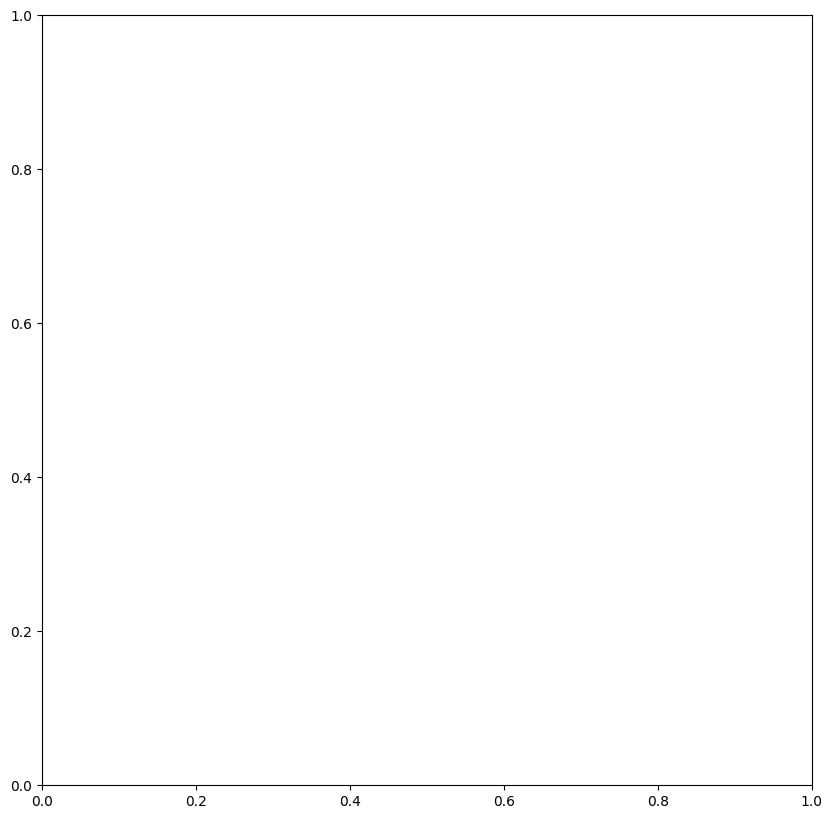

In [ ]:
ax = really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True)
really_close_burbs.centroid.plot(ax=ax)

## Handy links

* [Geopandas docs](http://geopandas.readthedocs.io)
* [Geopandas on GitHib](https://github.com/geopandas/geopandas)
* [Another map making tutorial](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html)
* [MatPlotLib colour scale options](http://matplotlib.org/users/colormaps.html)

I'd love to hear if you come across any other useful things!